## Benchmarking fidelity

In [74]:
from problem import qft
import utilities, numpy as np
from qoop.core import metric
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
versions = ['FP32', 'FP16', 'FX32', 'FX24', 'FX16']

fidelities = [[], [], [], [], []]
for i, version in enumerate(versions):
    print(version)
    for num_qubits in range(3, 11):
        # From simulator
        state = qft.qft_Qsun_verify(num_qubits)
        state = np.expand_dims(state, axis=1)

        sigma = state @ np.transpose(np.conjugate(state))
        # from FPGA emulator
        state_qft = utilities.read_complex_numbers(f'./data/qft/FPGA_{version}/QFT_Output_{num_qubits}_qubit.txt')
        state_qft = np.expand_dims(state_qft, axis=1)
        rho = state_qft @ np.transpose(np.conjugate(state_qft))
        # if num_qubits == 15:
        #     print(state[10:14])
        #     print(state_qft[10:14] )
        fidelities[i].append(metric.compilation_trace_fidelity(rho, sigma))

FP32
FP16
FX32
FX24
FX16


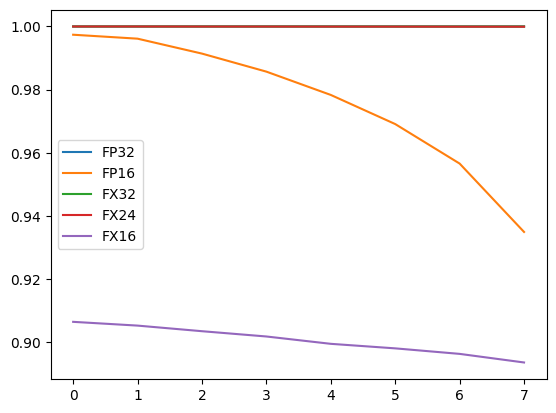

In [102]:
import matplotlib.pyplot as plt
for i, version in enumerate(versions):
    plt.plot(fidelities[i], label=version)
plt.legend()

## Benchmarking wall time

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from problem import qft
import time
%load_ext autoreload
%autoreload 2
num_qubits = 15
num_repeat = 1

import constant
import json
# ---- Benchamrking PSR on Qsun ----
timess = np.zeros((len(constant.packages), num_qubits))
funcs = [qft.qft_Qsun, qft.qft_ProjectQ, qft.qft_Qiskit, qft.qft_Pennylane]
for j, package in enumerate(constant.packages):
    print(f'-- Package: {package} --')
    for i in range(3, num_qubits + 1):
        print(f'-- # qubits: {i} --')
        times = []
        for _ in range(num_repeat):
            start = time.time()
            prob = funcs[j](i)
            end = time.time()
            times.append(end-start)
        timess[j][i - 1] = np.mean(times)

data = {}
for j, package in enumerate(constant.packages):
    data[package] = list(timess[j])

with open('./time/qft_cad102.json', 'w') as f:
    json.dump(data, f)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
-- Package: Qsun --
-- # qubits: 3 --
-- # qubits: 4 --
-- # qubits: 5 --
-- # qubits: 6 --
-- # qubits: 7 --
-- # qubits: 8 --
-- # qubits: 9 --
-- # qubits: 10 --
-- # qubits: 11 --
-- # qubits: 12 --
-- # qubits: 13 --
-- # qubits: 14 --
-- # qubits: 15 --
-- Package: ProjectQ --
-- # qubits: 3 --
(Note: This is the (slow) Python simulator.)
-- # qubits: 4 --
(Note: This is the (slow) Python simulator.)
-- # qubits: 5 --
(Note: This is the (slow) Python simulator.)
-- # qubits: 6 --
(Note: This is the (slow) Python simulator.)
-- # qubits: 7 --
(Note: This is the (slow) Python simulator.)
-- # qubits: 8 --
(Note: This is the (slow) Python simulator.)
-- # qubits: 9 --
(Note: This is the (slow) Python simulator.)
-- # qubits: 10 --
(Note: This is the (slow) Python simulator.)
-- # qubits: 11 --
(Note: This is the (slow) Python simulator.)
-- # qubits: 12 --
(Note: This is the (slow) Python simulat

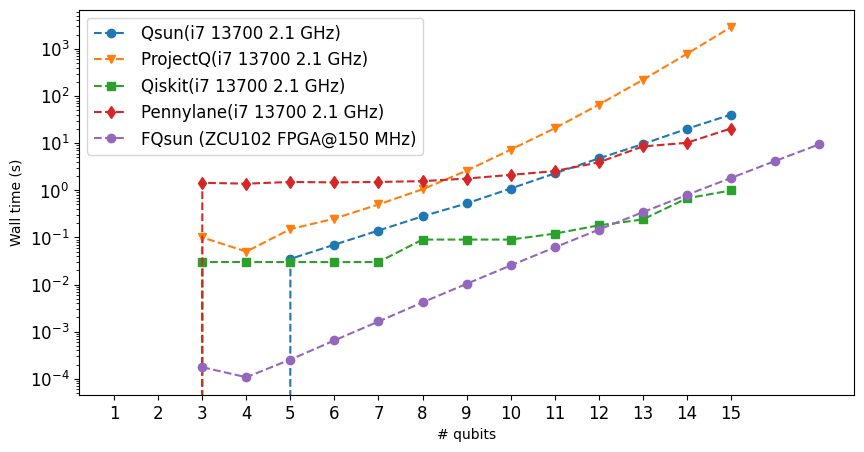

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
power = [35, 50, 30, 30]
for j in range(len(timess)):
    plt.plot(range(1, 16), np.array(timess[j])*power[j], label=constant.packages[j] + '(i7 13700 2.1 GHz)', marker = constant.markers[j], linestyle =  constant.line_styles[j]) 
times_FQsun = [
    0.000075, 0.000046, 0.000109, 0.000278, 0.000700, 0.001777, 0.004398, 0.010825, 
    0.026016, 0.062033, 0.145243, 0.337745, 0.774514, 1.766410, 3.985272
]

plt.plot(range(3,18), np.array(times_FQsun) * 2.350, marker = 'o', linestyle = '--', label='FQsun (ZCU102 FPGA@150 MHz)')

plt.xticks(range(1, num_qubits + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.xlabel('# qubits')
plt.legend(fontsize=12)
plt.ylabel('Wall time (s)')
plt.show()
# plt.savefig('compare_time_QCD_projectq.png')